## Introduction to scikit learn (sklearn)

what we are going to cover:

0. an end to end scikit learn workflow
1. getting the data ready
2. choosing the right estimator/algorithm for our problem
3. fit the model/algorithm and use it to make predictions on our data
4. evaluating a model
5. improve a model
6. save and load a trainde model
7. putting it all together!

### 0. an end to end scikit learn workflow

In [1]:
# 1. get the data ready
import numpy as np
import pandas as pd
heart_dis=pd.read_csv("data/011 heart-disease.csv")
heart_dis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# create x (features matrix)
x=heart_dis.drop("target" ,axis=1)

# create y (labels)
y=heart_dis["target"]

In [2]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

# we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
 clf.fit(x_train,y_train);
    

In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2


In [8]:
 # make a prediction
y_preds = clf.predict(x_test)

In [9]:
y_preds


array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [12]:
# 4. evaluate the model on the training data and test data
clf.score(x_train,y_train)


1.0

In [13]:
clf.score(x_test,y_test)

0.8032786885245902

In [3]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

NameError: name 'y_test' is not defined

In [15]:
confusion_matrix(y_test,y_preds)

array([[16,  6],
       [ 6, 33]], dtype=int64)

In [16]:
accuracy_score(y_test,y_preds)

0.8032786885245902

In [17]:
# 5. improve the model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators ...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%")
    print("")

trying model with 10 estimators ...
model accuracy on test set:73.77%

trying model with 20 estimators ...
model accuracy on test set:75.41%

trying model with 30 estimators ...
model accuracy on test set:80.33%

trying model with 40 estimators ...
model accuracy on test set:81.97%

trying model with 50 estimators ...
model accuracy on test set:75.41%

trying model with 60 estimators ...
model accuracy on test set:78.69%

trying model with 70 estimators ...
model accuracy on test set:80.33%

trying model with 80 estimators ...
model accuracy on test set:78.69%

trying model with 90 estimators ...
model accuracy on test set:77.05%



In [18]:
#6. save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [19]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.7704918032786885

In [21]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.9 | packaged by conda-forge | (main, Jan 11 2023, 15:15:40) [MSC v.1916 64 bit (AMD64)]
executable: D:\ds_projects\project_1\env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.2.1
          pip: 22.3.1
   setuptools: 65.6.3
        numpy: 1.23.5
        scipy: 1.10.0
       Cython: None
       pandas: 1.5.2
   matplotlib: 3.7.0
       joblib: 1.1.1
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: D:\ds_projects\project_1\env\Library\bin\mkl_rt.1.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2021.4-Product
    num_threads: 4
threading_layer: intel

       filepath: D:\ds_projects\project_1\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


## 1. Getting our data ready to be used with machine learning

three main things we have to do:

    1. split the data into features and labels (usually `X` & `Y`)
    2. filling (also called imputing) or disregarding missing values
    3. converting non-numerical values to numerical values(called feature encoding)

In [2]:
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]

In [3]:
# split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [4]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [6]:
x.shape[0]*0.7

212.1

# 1.1 Make sure it's all numerical

In [9]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [10]:
len(car_sales)

1000

In [11]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [13]:
# split into x/y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#split into training and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
# Built machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [19]:
car_sales["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [16]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [17]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [21]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [ ]:
# Let's refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,
                                              y,
                                              test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

## 1.2 What if there were missing values?

    1. fill them with some value(also known as imputation).
    2. remove the samples with missing data altogether.

In [12]:
# Import car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [13]:
car_sales_missing.isna().sum() # total missing values

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [14]:
# create X & y
x= car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]


In [21]:
# Let's try and convert our data to numbers

# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorial_features)],
                             remainder="passthrough")

transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 1:fill missing data with pandas

In [15]:
# fill make
car_sales_missing["Make"].fillna("missing",inplace=True)
# fill colour
car_sales_missing["Colour"].fillna("missing",inplace=True)
# fill odometer (KM)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
# fill doors
car_sales_missing["Doors"].fillna(4,inplace=True)

In [16]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [17]:
# remove rows with missing row values
car_sales_missing.dropna(inplace=True)

In [18]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [19]:
len(car_sales_missing)

950

### option 2: fill missing values with scikit learn

In [22]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")

In [25]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [24]:
car_sales_missing.dropna(subset=["Price"],inplace=True)

In [29]:
# split into x & y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [28]:
# fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with missing & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer= SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns
cat_features = ["Make","Colour"]
door_feature= ["Doors"]
num_features=["Odometer (KM)"]

# create an imputer (something that fills missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_features)
])

# transform the data
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [30]:
car_sales_filled=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [34]:
# Let's try and convert our data to numbers

# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorial_features)],
                             remainder="passthrough")

transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [35]:
# now we have got our data as numbers and filled (no missing values)
# let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)


model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

# 2. Choosong the right estimators/algo for your problem

some things to note:

    * Sklearn refrs to machine learning models ,algorithms as estimators
    * Classification problem -predicting a category(heart disease or not)
        * Sometimes you will see `clf` (short for classifier)used as a classification estimator
    * Regression problem -predicting a number(selling price of a car)
    
 if you are working on a machine learning problem and not sure what model you should use, refer to the sklearn map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 picking a machine learning model for a regression problem

let's use the california Housing dataset

In [2]:
# get housing dataset
from sklearn.datasets import fetch_california_housing
housing =fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
housing_df["MedHouseVal"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
x=housing_df.drop("MedHouseVal",axis=1)
y=housing_df["MedHouseVal"]

In [8]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [12]:
model.score(x_test,y_test)

0.824838884806028

In [13]:
# Import algorithm
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)

# Create the data
x=housing_df.drop("MedHouseVal",axis=1)
y=housing_df["MedHouseVal"] # median house price in $100,000s

# split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate and fit the model (ont hte training set)
model=Ridge()
model.fit(x_train,y_train)

# check the score of the model (on the test set)
model.score(x_test,y_test)

0.5758549611440126

In [14]:
# Import algorithm
from sklearn.linear_model import Lasso
# Setup random seed
np.random.seed(42)

# Create the data
x=housing_df.drop("MedHouseVal",axis=1)
y=housing_df["MedHouseVal"] # median house price in $100,000s

# split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate and fit the model (ont hte training set)
model=Lasso()
model.fit(x_train,y_train)

# check the score of the model (on the test set)
model.score(x_test,y_test)

0.2841671821008396

018
What if `Ridge` didn't work or the score didn't fit our needs?
well, we could always try a different model...
how about we try an ensemble model (an ensemble is conmbination of smaller models to try and make better predictions than just a single model)

In [9]:
# import the randomforestregressor model class from the nensemble module
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
x=housing_df.drop("MedHouseVal",axis=1)
y=housing_df["MedHouseVal"]

# split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# create random forest model
model=RandomForestRegressor()
model.fit(x_train,y_train)

# check the score of the model on the test set
model.score(x_test,y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem

In [3]:
heart_dis=pd.read_csv("data/011 heart-disease.csv")
heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
from sklearn.model_selection import train_test_split

In [6]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make the data
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#  instantiate LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)

# evaluate the LinearSVC
clf.score(x_test,y_test)

D:\ds_projects\project_1\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [7]:
# import the randomforestclassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#  instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

# evaluate the RandomForestClassifier
clf.score(x_test,y_test)

0.8524590163934426

# video 22

## 3. fit the model/algo on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `x` = features , features variables, data
* `y` = labels, targets, target variables

In [5]:
# import the randomforestclassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#  instantiate RandomForestClassifier
clf=RandomForestClassifier()

# fit the model to the data
clf.fit(x_train,y_train)

# evaluate the RandomForestClassifier
clf.score(x_test,y_test)

0.8524590163934426

# video 23

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [7]:
# use a trained model to make predictions
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [8]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [9]:
# compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [11]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test,y_preds)

0.8524590163934426

# video 24
make predictions with `predict_proba()`

In [17]:
## predict_proba returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [18]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

# video 25

`predict` can also be used for regression models

In [2]:
from sklearn.datasets import fetch_california_housing
housing =fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
housing["data"]

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
housing_df["MedHouseVal"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

# create the data
x=housing_df.drop("MedHouseVal",axis=1)
y=housing_df["MedHouseVal"]

# split into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# create model instance
clf=RandomForestRegressor()

# train/fit our model
clf.fit(x_train,y_train)

# make predictions
clf.score(x_test,y_test)

0.8065734772187598

In [7]:
y_preds=clf.predict(x_test)

In [7]:
np.array(y_test[:15])

C:\Users\Prashant Dahiya\AppData\Local\Temp\ipykernel_8608\2246929116.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.array(y_test[:15])


array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  , 1.232  , 2.539  , 2.151  , 2.205  ,
       2.198  ])

In [8]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

# video 26

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-learn models/estimators:

    1. Estimator's built-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric functions

## 4.1 evaluating a model with the `score` method

In [9]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create x & y
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]

# ceate train/test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Create classifier model instance
clf=RandomForestClassifier(n_estimators=200)

# fit classifier to training data
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

## video 27

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

# create the data
x=housing_df.drop("MedHouseVal",axis=1)
y=housing_df["MedHouseVal"]

# split into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# create model instance
clf=RandomForestRegressor(n_estimators=2)

# train/fit our model
clf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=2)

In [11]:
clf.score(x_test,y_test)
# the default score() evaluation metric is r_squared for regression algorithms

0.7000978702214974

 ### 4.2 Evaluating a model using the `scoring` parameter

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x & y
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]

# ceate train/test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Create classifier model instance
clf=RandomForestClassifier()

# fit classifier to training data
clf.fit(x_train,y_train)



RandomForestClassifier()

In [11]:
clf.score(x_test,y_test)

0.8524590163934426

In [22]:
cross_val_score(clf,x,y,cv=10)

array([0.80645161, 0.74193548, 0.77419355, 0.7       , 0.86666667,
       0.53333333, 0.73333333, 0.7       , 0.56666667, 0.8       ])

In [21]:
%%html
<img src="images/cross-validation.png"/>

In [12]:
np.random.seed(42)

# single training and test split score
clf_single_score=clf.score(x_test,y_test)

# take the mean of 5-fold cross-validation score
clf_score_val_score=np.mean(cross_val_score(clf,x,y,cv=5))

#compare the two
clf_single_score,clf_score_val_score

(0.8524590163934426, 0.8248087431693989)

In [14]:
# default scoring parameter of classifier = mean accuracy
clf.score(x_train,y_train)

0.9090909090909091

In [15]:
# scoring parameter set to none by default

cross_val_score(clf,x,y,scoring=None)


array([0.72131148, 0.72131148, 0.59016393, 0.7       , 0.65      ])

## video 29

### 4.2.1 classification model evaluation metrices

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

### Accuracy

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,x,y)

In [14]:
np.mean(cross_val_score)

0.8248087431693989

In [19]:
print(f"Heart disease Classifier Cross-validated Accuracy:{np.mean(cross_val_score)*100:2f}%")

Heart disease Classifier Cross-validated Accuracy:82.480874%


### video 30

**Area under the receiver operating characteristic curve(AUC/ROC)**

* Area under curve
* ROC curve

ROC curves a comparison of a model's true positive rate (tpr) versus models false rate(ftr).

* True positive = model predicts 1 when truth is 1
* false positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* false negative = model predicts 0 when truth is 1

In [11]:
from sklearn.metrics import roc_curve

# create X_test.. etc
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train)

# make predictions with probabilities
y_probs=clf.predict_proba(x_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [12]:
y_probs_positive=y_probs[:,1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [13]:
# calculate ftr,tpr and thresholds
fpr,tpr,thresholds= roc_curve(y_test,y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [14]:
thresholds

array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

**video 31**

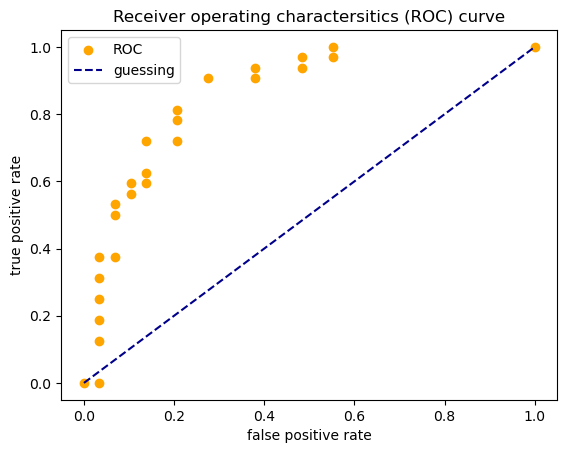

In [15]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate(tpr) of a model
    """
    # plot roc curve
    plt.scatter(fpr,tpr,color="orange",label="ROC")
    
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="guessing")
    
    # customize the plot
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("Receiver operating charactersitics (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

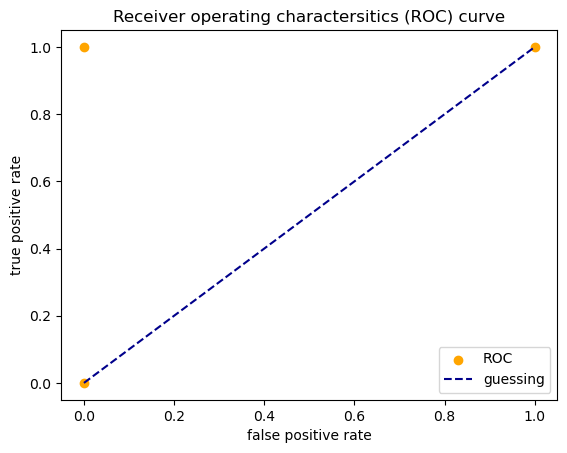

In [19]:
# plot perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [19]:
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence,giving you an idea of where the model is getting confused.

In [20]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [21]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [27]:
# how to install a conda package from a jupyter notebook into the current environment
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: D:\ds_projects\project_1\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.2             |  py310haa95532_0         492 KB
    ------------------------------------------------------------
                                           Total:         492 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.12.2-py310haa95532_0 




seaborn-0.12.2       | 492 KB    |            |   0% 
seaborn-0.12.2       | 492 KB    | 3          |   3% 
seaborn-0.12.2       | 492 KB    | ###8       |  39% 
seaborn-0.12.2       | 492 KB    | ########## | 100% 
seaborn-0.12.2       | 492 KB    | ########## | 100% 
                                                     


Preparing transac



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1




<Axes: >

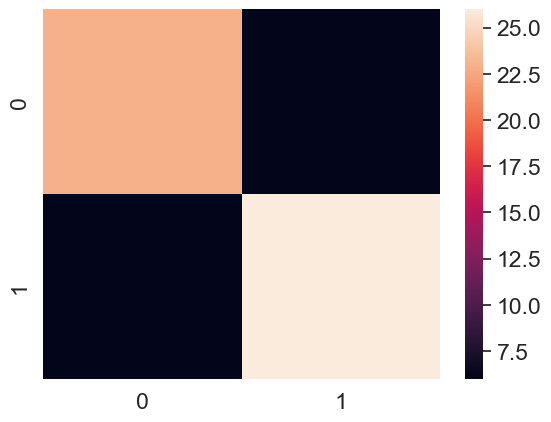

In [22]:
# make our confusion matrix more visual with Saborn's heatmap()
import seaborn as sns
  
# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# plot it using Seaborn
sns.heatmap(conf_mat)

### video 34

 **Confusion matrix**

a confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
in essence , this gives you an idea of where the model is getting confused.

In [24]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [29]:
pd.crosstab(y_test,y_preds,
           colnames=["Predicted  label"],
           rownames=["Actual label"])

Predicted label,0,1
Actual label,,
0,23,6
1,6,26


### creating a confusion matrix using scikit-learn
to use the new methods of creating a confusion matrix with scikit learn you will need scikit learn version 1.0

In [30]:
import sklearn
sklearn.__version__

'1.2.1'

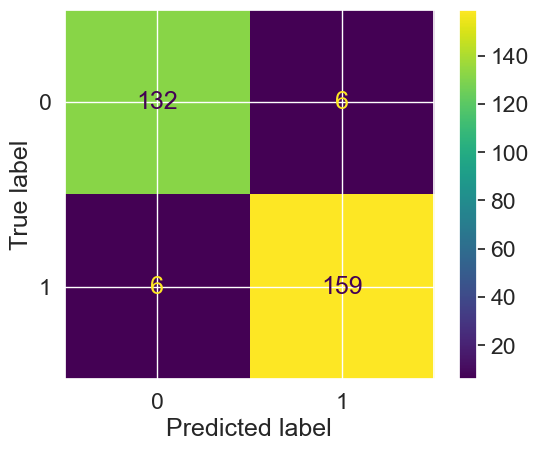

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)

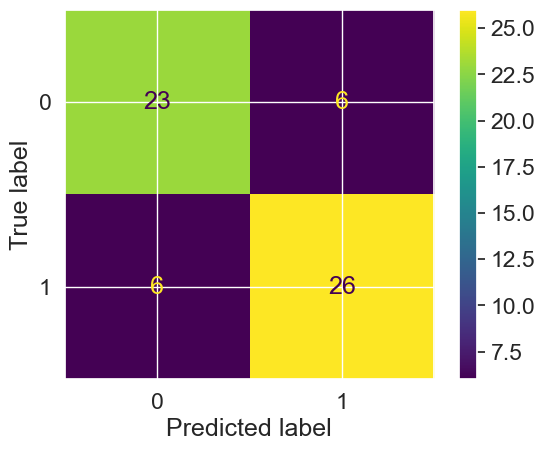

In [36]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds);

**classification Report**

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### video 36

## 4.2.2 Regression model evaluation metrices


the one's we are going to cover are:

1. R^2 (r-squared) coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [38]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [40]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("MedHouseVal",axis=1)
y=housing_df["MedHouseVal"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
model.score(x_test,y_test)

0.8065734772187598

In [42]:
y_pred=model.predict(x_test)

In [45]:
y_test.head()

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64

In [44]:
pd.DataFrame(y_pred,y_test,columns=["y_pred"])

,y_pred
MedHouseVal,
0.47700,0.493840
0.45800,0.754940
5.00001,4.928596
2.18600,2.543160
2.78000,2.331760
...,...
2.63300,2.220380
2.66800,1.947760
5.00001,4.836378
